In [1]:
from data_loader import OpenImagesDataset, collate_fn
from model_utils import plot_tensor, plot_image
from model_transformations import Transformations
from torch.utils.data import DataLoader
from params import DEVICE, CPU_DEVICE
from model import DogDetectorModel
import torch
from model_trainer import trainer
from model_evaluator import evaluator
from non_max_surpression import NonMaxSurpression

In [2]:
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

In [3]:
# Initializing the model
model = DogDetectorModel()

# Moving to training device
model = model.to(DEVICE)

In [4]:
# Reading in the training data
trainingData = OpenImagesDataset(rootDirectory='open-images-v6',
                                 transform=Transformations, 
                                 dataType='train')    

# Defining the training data
trainDataLoader = DataLoader(dataset=trainingData, 
                             batch_size=2,
                             num_workers=2,
                             shuffle=False, collate_fn=collate_fn)

# Reading in the training data
validationData = OpenImagesDataset(rootDirectory='open-images-v6',
                                 transform=Transformations, 
                                 dataType='validation')    

# Defining the training data
validationDataLoader = DataLoader(dataset=validationData, 
                             batch_size=1,
                             num_workers=2,
                             shuffle=False, collate_fn=collate_fn)

In [5]:
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# Defining the learning rate that makes a step every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [6]:
NUM_EPOCHS = 10
START_EPOCH = 0

In [7]:
BEST_MAP = 0

In [8]:
# checkpoint = torch.load('model.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# START_EPOCH = checkpoint['epoch']
# BEST_MAP = checkpoint['bestLoss']

In [9]:
MAPs = []
losses = []

for epoch in range(START_EPOCH, NUM_EPOCHS):
    # ***************** TRAINING ******************    

    loss = trainer(model, optimizer, trainDataLoader, epoch)
    
    losses.append(losses)
    
    # Updating the learning rate scheduler
    lr_scheduler.step()
    
    # ***************** EVALUATION ******************    

    coco_evaluator, MAP = evaluator(model, validationDataLoader)
    
    print('MAP:', MAP)
    
    MAPs.append([epoch, MAP])
    
    if MAP > BEST_MAP:
        print('Saving New Model')
        PATH = "model_2.pt"
        torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'bestLoss': MAP,
        'MAPs': MAPs,
        'trainingLosses': losses
        }, PATH)
        
        BEST_MAP = MAP
        
    

    
   


  0%|                                                                                                                                                                                                                                                                                          | 0/2500 [00:00<?, ?it/s]/home/aidan/Programs/miniconda3/envs/dogapp/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
EPOCH: 0 | Classifier Loss 0.058744192123413086 | Bbox Loss: 0.052478570491075516 | Objectness Loss 0.007577801588922739 | Loss 0.1259492188692093: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:35<00:

EPOCH: 0 | Classifier Loss 0.058744192123413086 | Bbox Loss: 0.052478570491075516 | Objectness Loss 0.007577801588922739 | Mean Loss 0.17746236233115195
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.31it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 1 | Classifier Loss 0.038557279855012894 | Bbox Loss: 0.037908971309661865 | Objectness Loss 0.004653729032725096 | Loss 0.08785885572433472: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [15:13<00:00,  2.74it/s]


EPOCH: 1 | Classifier Loss 0.038557279855012894 | Bbox Loss: 0.037908971309661865 | Objectness Loss 0.004653729032725096 | Mean Loss 0.1498253998875618
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.94it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 2 | Classifier Loss 0.058721281588077545 | Bbox Loss: 0.041734155267477036 | Objectness Loss 0.012226397171616554 | Loss 0.11857496947050095: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:37<00:00,  3.30it/s]


EPOCH: 2 | Classifier Loss 0.058721281588077545 | Bbox Loss: 0.041734155267477036 | Objectness Loss 0.012226397171616554 | Mean Loss 0.14360422862768174
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.01it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 3 | Classifier Loss 0.030413785949349403 | Bbox Loss: 0.02182738482952118 | Objectness Loss 0.003194853663444519 | Loss 0.05999535694718361: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:23<00:00,  3.36it/s]


EPOCH: 3 | Classifier Loss 0.030413785949349403 | Bbox Loss: 0.02182738482952118 | Objectness Loss 0.003194853663444519 | Mean Loss 0.1146788833707571
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.07it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 4 | Classifier Loss 0.037179335951805115 | Bbox Loss: 0.03577456623315811 | Objectness Loss 0.002814326900988817 | Loss 0.07994163781404495: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:18<00:00,  3.38it/s]


EPOCH: 4 | Classifier Loss 0.037179335951805115 | Bbox Loss: 0.03577456623315811 | Objectness Loss 0.002814326900988817 | Mean Loss 0.10856978970766068
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.83it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 5 | Classifier Loss 0.025658337399363518 | Bbox Loss: 0.024130970239639282 | Objectness Loss 0.007644468452781439 | Loss 0.0617443285882473: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:24<00:00,  3.36it/s]


EPOCH: 5 | Classifier Loss 0.025658337399363518 | Bbox Loss: 0.024130970239639282 | Objectness Loss 0.007644468452781439 | Mean Loss 0.1056228077031672
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.77it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 6 | Classifier Loss 0.028660859912633896 | Bbox Loss: 0.024394551292061806 | Objectness Loss 0.0014981463318690658 | Loss 0.058306559920310974: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:22<00:00,  3.37it/s]


EPOCH: 6 | Classifier Loss 0.028660859912633896 | Bbox Loss: 0.024394551292061806 | Objectness Loss 0.0014981463318690658 | Mean Loss 0.10170956591516733
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.08it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 7 | Classifier Loss 0.023159073665738106 | Bbox Loss: 0.04051147773861885 | Objectness Loss 0.0019446677761152387 | Loss 0.07111428678035736: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:34<00:00,  3.31it/s]


EPOCH: 7 | Classifier Loss 0.023159073665738106 | Bbox Loss: 0.04051147773861885 | Objectness Loss 0.0019446677761152387 | Mean Loss 0.10024435803815722
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.15it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 8 | Classifier Loss 0.02202480100095272 | Bbox Loss: 0.018753714859485626 | Objectness Loss 0.004440707620233297 | Loss 0.0489354208111763: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:33<00:00,  3.07it/s]


EPOCH: 8 | Classifier Loss 0.02202480100095272 | Bbox Loss: 0.018753714859485626 | Objectness Loss 0.004440707620233297 | Mean Loss 0.10025566446036101
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.86it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 9 | Classifier Loss 0.016404002904891968 | Bbox Loss: 0.02098359540104866 | Objectness Loss 0.009623588994145393 | Loss 0.05391829460859299: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:35<00:00,  3.07it/s]


EPOCH: 9 | Classifier Loss 0.016404002904891968 | Bbox Loss: 0.02098359540104866 | Objectness Loss 0.009623588994145393 | Mean Loss 0.099952843683213
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.33it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

In [12]:
MAPs

[[0, tensor(0.6089)],
 [1, tensor(0.6316)],
 [2, tensor(0.6119)],
 [3, tensor(0.7113)],
 [4, tensor(0.7213)],
 [5, tensor(0.7270)],
 [6, tensor(0.7272)],
 [7, tensor(0.7299)],
 [8, tensor(0.7293)],
 [9, tensor(0.7315)]]

# Loading and View Predictions

In [13]:
from non_max_surpression import NonMaxSurpression

In [14]:
nms = NonMaxSurpression()

In [15]:
checkpoint = torch.load('model.pt')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [16]:
images, targets = next(iter(validationDataLoader))

In [17]:
images = list(image.to(DEVICE) for image in images)
targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

In [18]:
# model.eval()
outputs = model(images, targets)

In [19]:
outputs = [{k: v.to(CPU_DEVICE) for k, v in t.items()} for t in outputs]

In [20]:
images = [img.to(CPU_DEVICE) for img in images]

In [21]:
outputs = nms(outputs)

In [22]:
outputs

[{'boxes': tensor([[471.4327, 130.2873, 807.5646, 494.0443]]),
  'labels': tensor([1.]),
  'scores': tensor([0.9952])}]

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

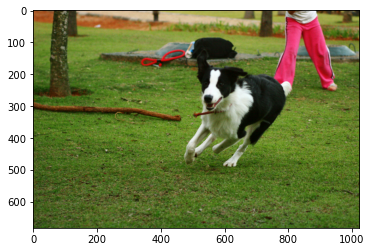

In [23]:
for i in range(0, len(images)):
    plot_tensor(images[i],targets[i]['boxes'], outputs[i]['boxes'])